<a href="https://colab.research.google.com/github/vithika-karan/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_Vithika_Karan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

###**Notebook Breakdown:**
* Business Problem Analysis
* Data Collection
* Data Cleaning and Preprocessing
* Feature Engineering
* Exploratory Data Analysis
    
    - Hypotheses Generation
    - Visualizing Data
    - EDA Conclusion and Validation 
    - Hypoheses Generation for Cluster Analysis
* Restaurant Clustering
  - 
* Sentiment Analysis


###**Business Problem Analysis**

###**Data Collection**

In [256]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [257]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
#reading datasets
rest_df = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Zomato Restaurant Clustering and Sentiment Analysis - Vithika Karan /Data & Resources/Zomato Restaurant names and Metadata.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Zomato Restaurant Clustering and Sentiment Analysis - Vithika Karan /Data & Resources/Zomato Restaurant reviews.csv")

In [259]:
# first five rows of restaurants dataset
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [260]:
#first five rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


###**Data Cleaning and Preprocessing**

In [261]:
#restaurnts info - null count and dtypes 
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.
Even when imputed with various categorical data imputing measures, it would be pretty difficult to match similar tags as the restaurants and then even more difficult to then convert them into a meaningful numerical feature afterward.
If the information contained in the variable is not that high, it is better to drop the variable if it has 50% or more missing values.

In [262]:
#drop collections
rest_df.drop('Collections', axis=1, inplace=True)

In [263]:
#Impute one missing timing row with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [264]:
#check nulls
rest_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [265]:
# changing cost datatype
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [266]:
#reviews info - null count and dtypes 
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [267]:
#exploring null rows in reviews column
reviews_df[reviews_df['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.

In [268]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [269]:
# checking
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [270]:
#rating is in object type
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [271]:
#like should not be here
# correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','4')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

###**Feature Engineering**

Feature engineering is the process of selecting, manipulating, and transforming raw data into meaningful numerical features that can be used by machine learning algorithms. 




####**Zomato Restaurant names and Metadata**

First, the restaurants dataset has columns such as Links, Cuisine, and Timings which aren't directly interpretable.
The location of the restaurant can be extracted by the Links column.
Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant.
Timings can be categorized into three categories to make analysis a little simpler.

**Links**

In [272]:
# link value
rest_df.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [273]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(location)

In [274]:
# looks like the dataset consists of the restaurants in Hyderabad
rest_df['Location'].unique()

array(['hyderabad', 'thetiltbarrepublic'], dtype=object)

In [275]:
# exploring the other value
rest_df[rest_df.isin(['thetiltbarrepublic'])].stack()

68  Location    thetiltbarrepublic
dtype: object

In [276]:
#doesnt have location
rest_df.loc[68,:]

Name                            The Tilt Bar Republic
Links       https://www.zomato.com/thetiltbarrepublic
Cost                                             1500
Cuisines           North Indian, Continental, Italian
Timings                12noon to 12midnight (Mon-Sun)
Location                           thetiltbarrepublic
Name: 68, dtype: object

In [277]:
#dropping unnecessary columns
rest_df.drop(['Links','Location'],axis=1,inplace=True)

In [278]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)

**Cuisines**

Here, it can be seen that the various cuisines served by every restaurant are in the form of strings and it's important to categorize and create dummy variables for all the cuisines served.
The procedure followed in doing this is as follows:
* First, strings are split to get the cuisines in the list datatype.
* A frequency dictionary is created to understand the unique cuisines and the frequency in which the cuisine occurs.
* An attempt is made to the club and categorize various misspelled cuisines and get a minimized number of unique cuisines.
* Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [279]:
#splitting to create list instead of strings
rest_df['Cuisines'] = rest_df['Cuisines'].apply(lambda x : x.split(','))

#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in rest_df.index:
  cuisine_list.append(rest_df['Cuisines'][idx])

#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [280]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

#frequency dictionary
frequency_dict

{' American': 2,
 ' Andhra': 3,
 ' Arabian': 1,
 ' Asian': 10,
 ' BBQ': 1,
 ' Bakery': 1,
 ' Beverages': 5,
 ' Biryani': 12,
 ' Burger': 3,
 ' Cafe': 1,
 ' Chinese': 36,
 ' Continental': 17,
 ' Desserts': 11,
 ' European': 2,
 ' Fast Food': 10,
 ' Finger Food': 1,
 ' Goan': 1,
 ' Hyderabadi': 3,
 ' Indonesian': 1,
 ' Italian': 12,
 ' Japanese': 2,
 ' Juices': 1,
 ' Kebab': 5,
 ' Malaysian': 1,
 ' Mediterranean': 4,
 ' Mithai': 1,
 ' Modern Indian': 1,
 ' Momos': 3,
 ' Mughlai': 5,
 ' North Indian': 28,
 ' Pizza': 1,
 ' Salad': 5,
 ' Seafood': 3,
 ' South Indian': 7,
 ' Spanish': 1,
 ' Sushi': 4,
 ' Thai': 2,
 ' Wraps': 1,
 'American': 4,
 'Andhra': 3,
 'Arabian': 1,
 'Asian': 5,
 'BBQ': 1,
 'Bakery': 6,
 'Biryani': 4,
 'Burger': 2,
 'Cafe': 5,
 'Chinese': 7,
 'Continental': 4,
 'Desserts': 2,
 'European': 2,
 'Fast Food': 5,
 'Finger Food': 1,
 'Healthy Food': 1,
 'Hyderabadi': 1,
 'Ice Cream': 2,
 'Italian': 2,
 'Kebab': 1,
 'Lebanese': 1,
 'Mediterranean': 1,
 'Mexican': 1,
 'Modern 

It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.

Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [281]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}


In [282]:
# just in case 
names_df = rest_df.copy()

In [283]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list

In [284]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [285]:
#check
names_df.head(3)

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"[European, North Indian, South Indian, Mughlai...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"[North Indian, Chinese, Hyderabadi]",11 AM to 11 PM
2,Flechazo,1300,"[North Indian, Mediterranean, Desserts, Asian]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


The next step is to create column features for the unique cuisines and assign values according to the row values available.

In [286]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [287]:
# iterating for every row in the dataframe
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_df.loc[i,column] = 1
        else:
          names_df.loc[i,column] = 0

In [288]:
#let's check
names_df.head(2)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food
0,Beyond Flavours,800.0,"[European, North Indian, South Indian, Mughlai...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,Paradise,800.0,"[North Indian, Chinese, Hyderabadi]",11 AM to 11 PM,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [289]:
# value for 1st restaurant and verifying 
names_df.loc[0,'Cuisines']

['European',
 'North Indian',
 'South Indian',
 'Mughlai',
 'Chinese',
 'Continental']

In [290]:
#creating a new column for the total number of cusines served by restaurants
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))


In [291]:
#check
names_df.head(1)

,Name,Cost,Cuisines,Timings,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800.0,"[European, North Indian, South Indian, Mughlai...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,6


In [292]:
#drop cuisines column
names_df.drop(['Cuisines'],axis=1,inplace=True)

**Timings**

In [293]:
#analyse the unique values in Timings
names_df['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

In [294]:
#drop timings
names_df.drop(['Timings'],axis=1,inplace=True)

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.

**Restaurant Average Ratings**

In [295]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

,Name,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


In [296]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(restaurant_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(1)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,6,4.28


In [297]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [298]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

####**Zomato Restaurant Reviews**



In [299]:
#head
reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0


In [300]:
# splitting meta data into reviews and followers seperately
reviews_df['Reviews'], reviews_df['Followers'] = reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])

reviews_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0,1,2.0


In [301]:
#drop Metadata
reviews_df.drop(['Metadata'],axis=1,inplace=True)

In [302]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

,Reviewer,Reviews,Followers,Rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000


###**Exploratory Data Analysis**
Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

*  Best restaurants in the city 
* The Most Popular Cuisines in Hyderabad
* Restaurants and their Costs



**Best Restaurants in the City**

There are various factors involved in choosing a good restaurant such as food, ambiance, cost, location, reviews, etc but the most important ones are cuisine, cost, and reviews.
The first thing that comes to mind while choosing a good restaurant is if the cuisine you like is available at the restaurant and then the taste should also be good. The second thing is value for money, it is important that you get what you paid for. To help in the above decisions reviews come into place. They give you an idea of what the restaurant is like from people who had been to the place several times. 

The dataset here has the features- Name, Cost, Total Cuisines, and Average Ratings to help in the decision making. Best restaurants in the city would be having low cost and high ratings and the number of total cuisines served. Let's go ahead and explore a bit.

In [303]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500.0
1,B-Dubs,4.81,1,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100.0
3,Paradise,4.70,3,800.0
4,Flechazo,4.66,4,1300.0
5,The Indi Grill,4.60,5,1500.0
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750.0
7,Over The Moon Brew Company,4.34,5,1200.0
8,Beyond Flavours,4.28,6,800.0
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800.0


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

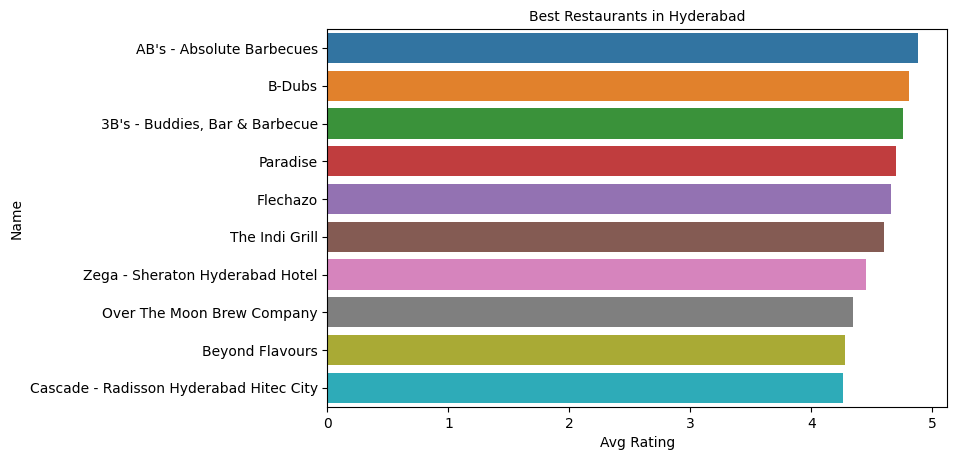

In [304]:
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

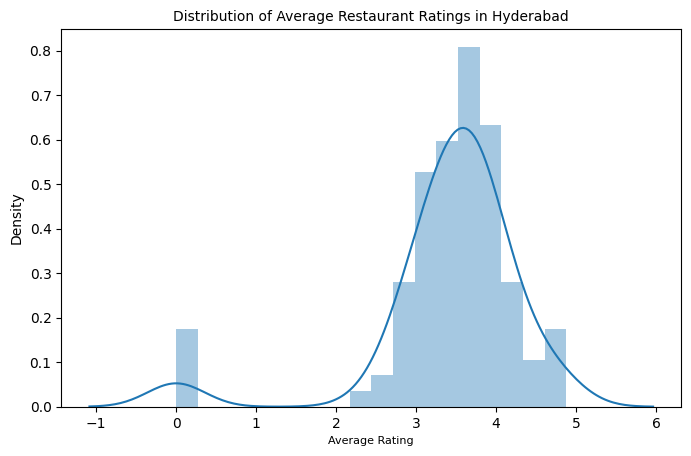

In [305]:
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.

**The Most Popular Cuisines in Hyderabad**

In [306]:
#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

,Cuisines,Total Restaurants
0,North Indian,64
1,Chinese,45
2,Continental,39
3,Hyderabadi,18
4,Fast Food,17
5,Italian,15
6,Asian,15
7,Desserts,14
8,Mughlai,13
9,South Indian,9


Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

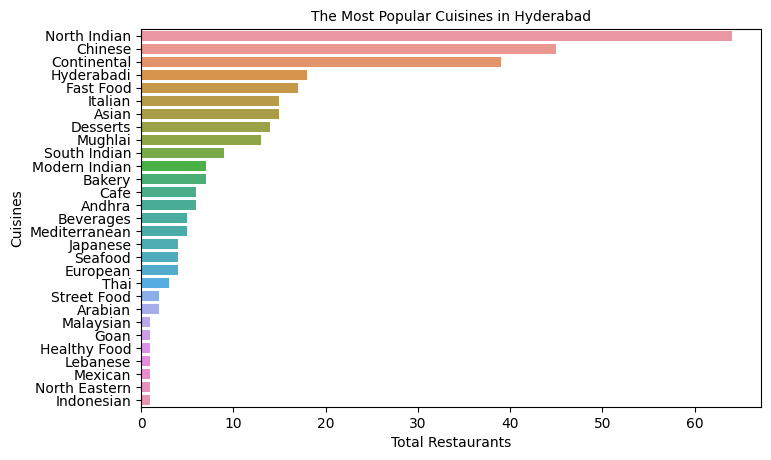

In [307]:
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

Although located in South India, North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.

**Restaurants and their Costs**

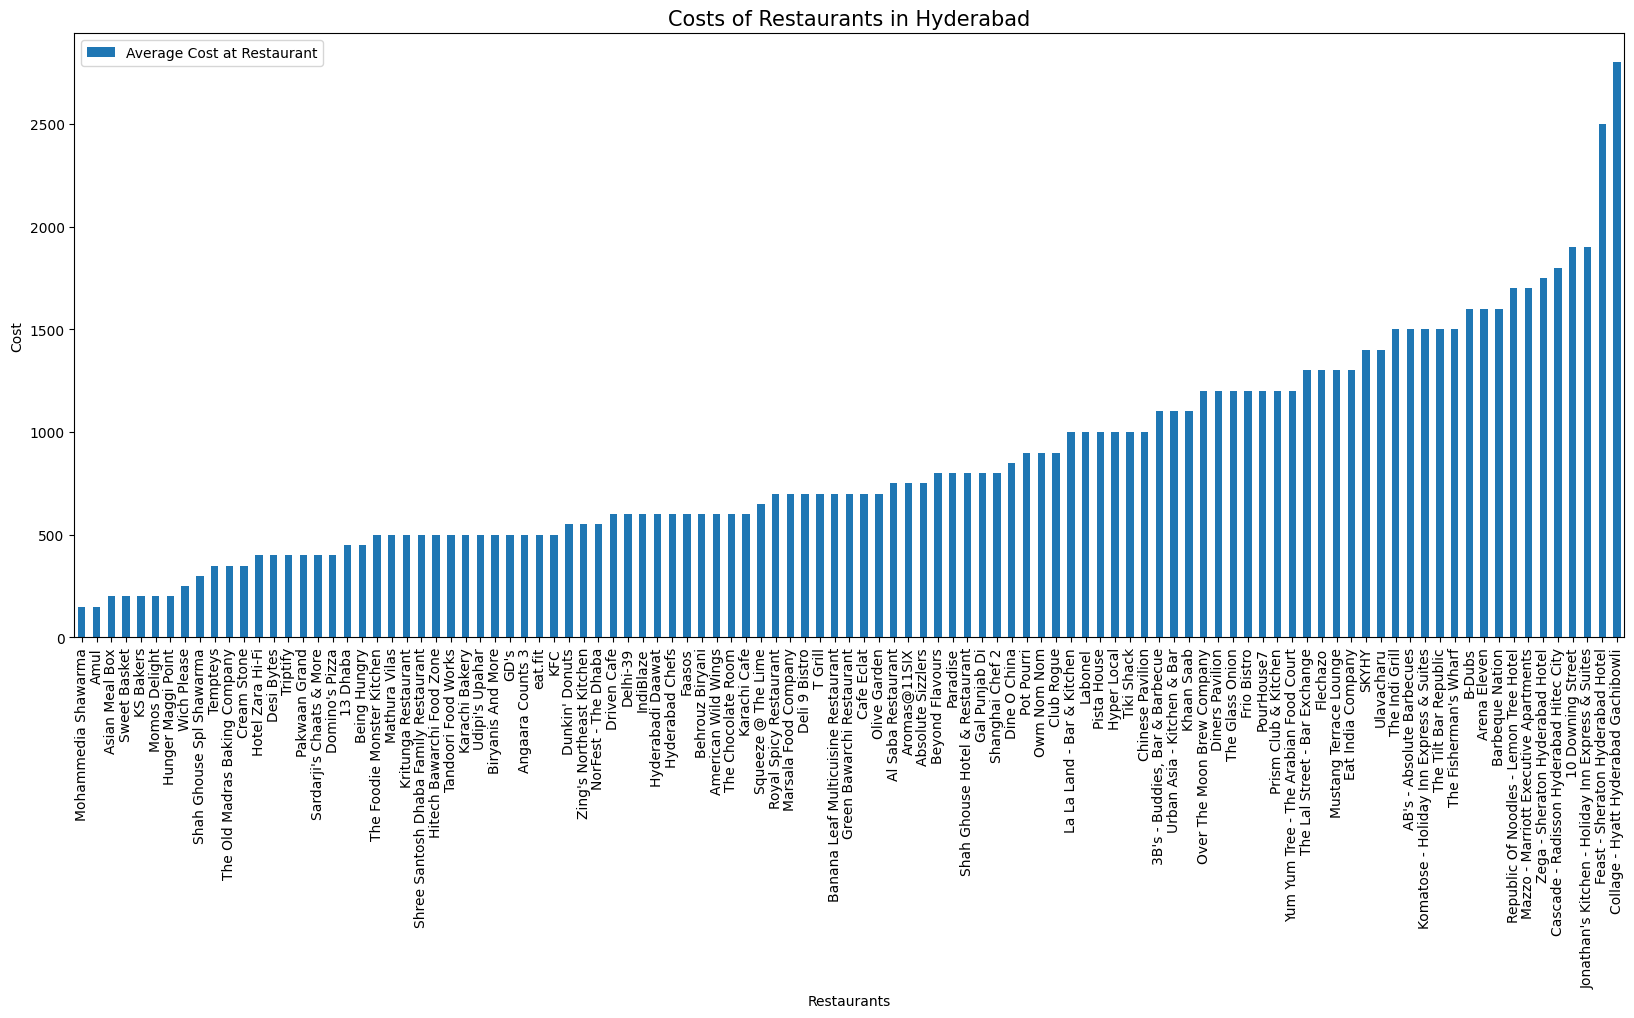

In [308]:
#visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

In [309]:
#top 5 cheapest restaurants
names_df[['Name','Cost']].sort_values(['Cost']).head()

,Name,Cost
89,Mohammedia Shawarma,150.0
23,Amul,150.0
54,Asian Meal Box,200.0
101,Sweet Basket,200.0
59,KS Bakers,200.0


The cheapest restaurants in the dataset are basically small food joints and bakeries.

In [310]:
#top 5 costliest restaurants
names_df[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800.0
56,Feast - Sheraton Hyderabad Hotel,2500.0
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
18,10 Downing Street,1900.0
91,Cascade - Radisson Hyderabad Hitec City,1800.0


The most expensive restaurants in the dataset are restaurants by 4 star above hotels.

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

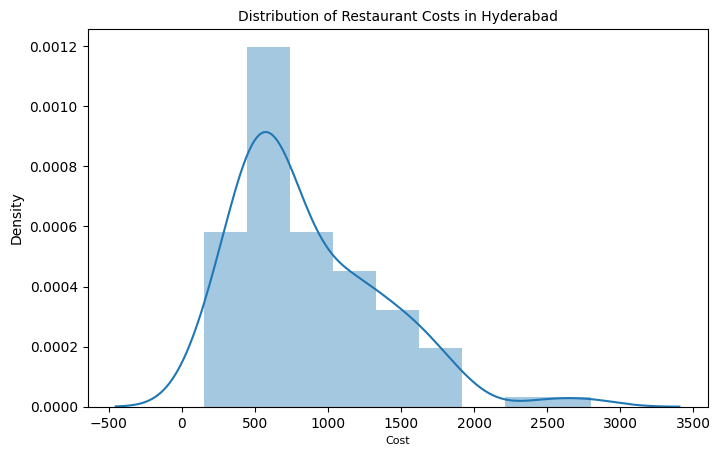

In [311]:
#distribution of Cost in Hyderabad
sns.distplot(x=names_df['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)

Most of the restaurants fall in the range of 500-1000 INR.

###**Restaurant Clustering**

**Feature Scaling**

In [312]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [313]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(names_df[numerical_cols])
scaled_df = names_df.copy()
scaled_df[numerical_cols] = scaler.transform(names_df[numerical_cols])

In [314]:
#setting name as index for both datasets
names_df['Index'] = list(range(0,105))
names_df.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,105))
scaled_df.set_index(['Index','Name'],inplace=True)

**Kmeans Clustering on Cost and Ratings**

In [315]:
#importing kmeans
from sklearn.cluster import KMeans

In [316]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

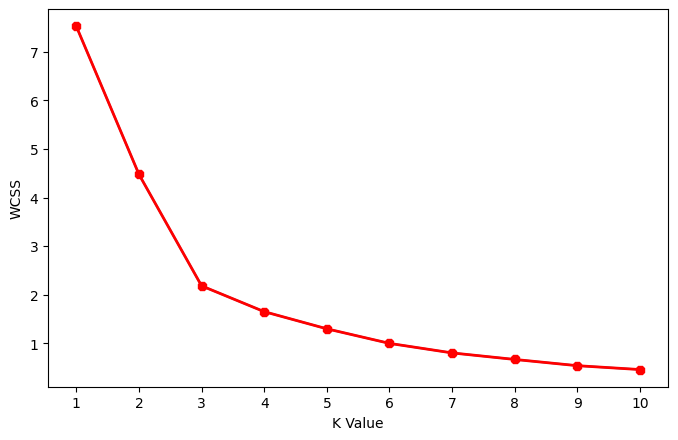

In [317]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

In [318]:
#create a copy
kmeans_df1 = scaled_df.copy()

In [319]:
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Avg Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

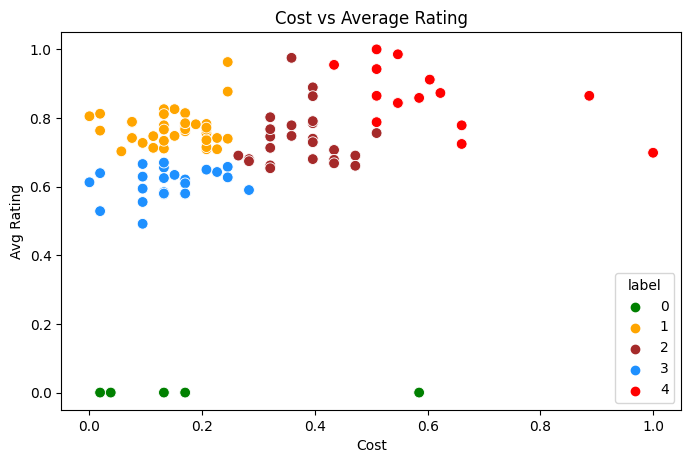

In [320]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other.
Since the input variables were just two, it is easier to distinguish and interpret them.
* Label 0 are those restaurants that were in the names dataset but weren't reviewed. 
* Label 1 are the restaurants that have good ratings with low pricing.
* Label 2 are fine dining restaurants with good ratings and average pricing.
* Label 3 restaurants are small food joints with low pricing but had average ratings.
* Label 4 are expensive restaurants that also had above-average ratings.

In [321]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

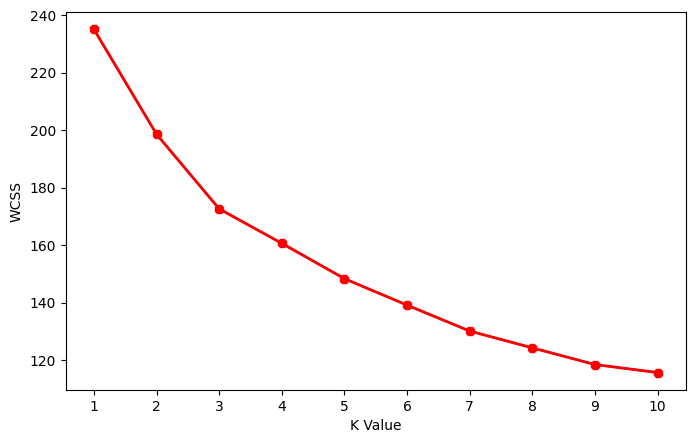

In [322]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

* No elbow in for K-means does not mean that there are no clusters in the data
* No elbow means that the algorithm used cannot separate clusters
* The curse of dimensionality

**KMeans Restaurant Clustering**
- Principal Component Analysis
- Silhouette Score
- Kmeans
- Visualization

In [323]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820424 0.16016826 0.08685552]
Cumulative variance explained by 3 principal components: 44.52%


Parameter: {'n_clusters': 2} Score 0.34846035036714174
Parameter: {'n_clusters': 3} Score 0.4134951573357964
Parameter: {'n_clusters': 4} Score 0.44370743597533957
Parameter: {'n_clusters': 5} Score 0.47803319795625837
Parameter: {'n_clusters': 6} Score 0.5170146504327767
Parameter: {'n_clusters': 7} Score 0.5141050068833775
Parameter: {'n_clusters': 8} Score 0.5163902758195061
Parameter: {'n_clusters': 9} Score 0.5033624484577968
Parameter: {'n_clusters': 10} Score 0.511547722173207


Text(0.5, 0, 'Number of Clusters')

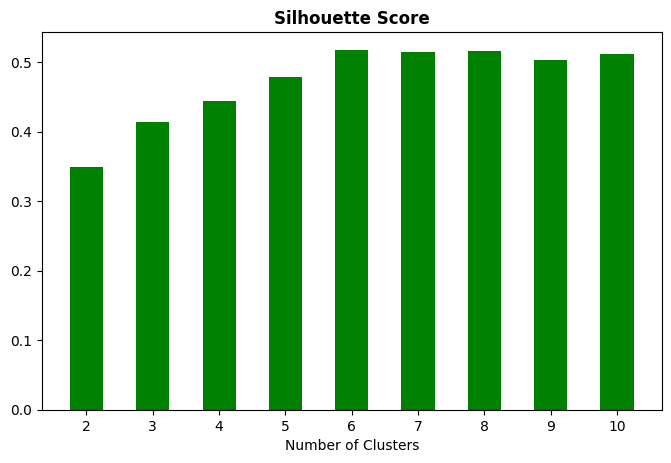

In [324]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [325]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=11)

In [326]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=names_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

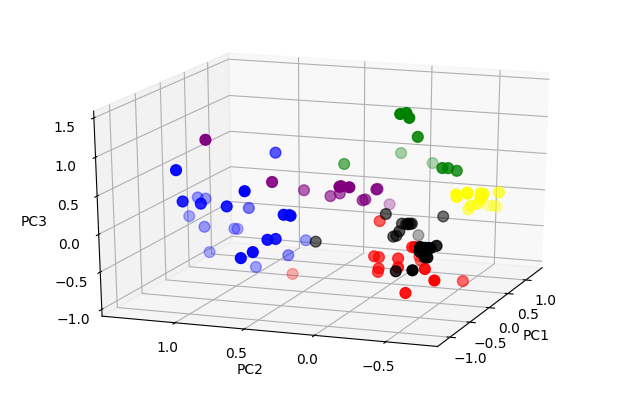

In [336]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [328]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(2)

,,PC1,PC2,PC3,label
Index,Name,,,,
0,Beyond Flavours,-0.885802,0.659062,-0.330774,2
1,Paradise,-0.858827,-0.606427,-0.020201,5


In [329]:
#joining the cluster labels to names dataframe
names_df = names_df.join(kmeans_pca_df['label'])
names_df.head(2)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,6,4.28,2
1,Paradise,800.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4.70,5


In [337]:
#value counts for different clusters
names_df['label'].value_counts()

5    25
2    24
1    17
4    16
0    13
3    10
Name: label, dtype: int64

**Cluster 0**

In [339]:
#exploring cluster 0 
names_df[names_df['label']==0].head(3)


,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15,KFC,500.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2.85,0
22,B-Dubs,1600.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.81,0
25,Tiki Shack,1000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.48,0


In [340]:
#describe
names_df[names_df['label']==0].describe()

,Cost,Total Cuisines,Avg Rating,label
count,13.000000,13.000000,13.000000,13.0
mean,942.307692,2.538462,3.429798,0.0
std,625.115374,1.198289,1.159394,0.0
min,400.000000,1.000000,0.000000,0.0
25%,500.000000,2.000000,3.095000,0.0
50%,600.000000,3.000000,3.610000,0.0
75%,1200.000000,3.000000,3.974026,0.0
max,2500.000000,5.000000,4.810000,0.0


In [341]:
#cluster cuisines
def cluster_cuisines(df,cluster):
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuisines1
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuisines1]
  #visualizing cuisines
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

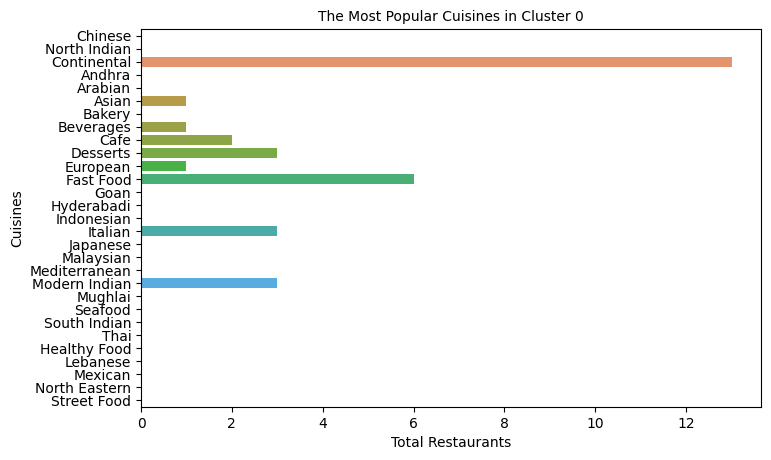

In [342]:
#visualizing cuisines in cluster 0
cluster_cuisines(names_df[names_df['label']==0],'Cluster 0')

**Cluster 0 Observation:**

*  The restaurants in cluster 0 have mostly continental and fast foods available with them.
* The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

**Cluster 1**

In [343]:
#exploring cluster  
names_df[names_df['label']==1].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Flechazo,1300.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4.66,1
10,Sardarji's Chaats & More,400.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3.25,1
14,AB's - Absolute Barbecues,1500.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4.88,1


In [344]:
#describe
names_df[names_df['label']==1].describe()

,Cost,Total Cuisines,Avg Rating,label
count,17.000000,17.000000,17.000000,17.0
mean,823.529412,2.588235,3.633235,1.0
std,363.626546,1.003670,0.624402,0.0
min,400.000000,1.000000,2.825000,1.0
25%,500.000000,2.000000,3.260000,1.0
50%,700.000000,3.000000,3.480000,1.0
75%,1100.000000,3.000000,3.800000,1.0
max,1500.000000,4.000000,4.880000,1.0


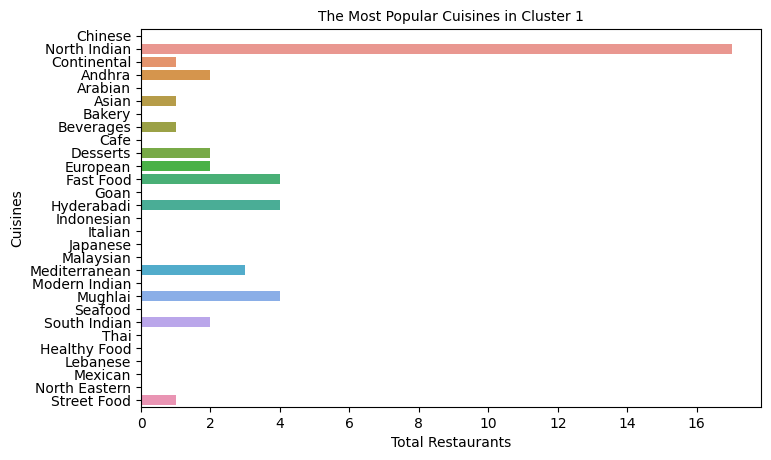

In [345]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_df[names_df['label']==1],'Cluster 1')

**Cluster 1 Observation:**

*  The restaurants in cluster 1 have mostly North Indian and other complimentary foods available with them.
* The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.

**Cluster 2**

In [346]:
#exploring cluster 2 
names_df[names_df['label']==2].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Beyond Flavours,800.0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,6,4.28,2
4,Over The Moon Brew Company,1200.0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,4.34,2
5,The Fisherman's Wharf,1500.0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,4.22,2


In [347]:
#describe
names_df[names_df['label']==2].describe()

,Cost,Total Cuisines,Avg Rating,label
count,24.000000,24.000000,24.000000,24.0
mean,1331.250000,4.208333,3.776667,2.0
std,487.186354,1.020621,0.421660,0.0
min,500.000000,2.000000,3.190000,2.0
25%,1000.000000,3.750000,3.400000,2.0
50%,1250.000000,4.000000,3.807500,2.0
75%,1525.000000,5.000000,4.196250,2.0
max,2800.000000,6.000000,4.600000,2.0


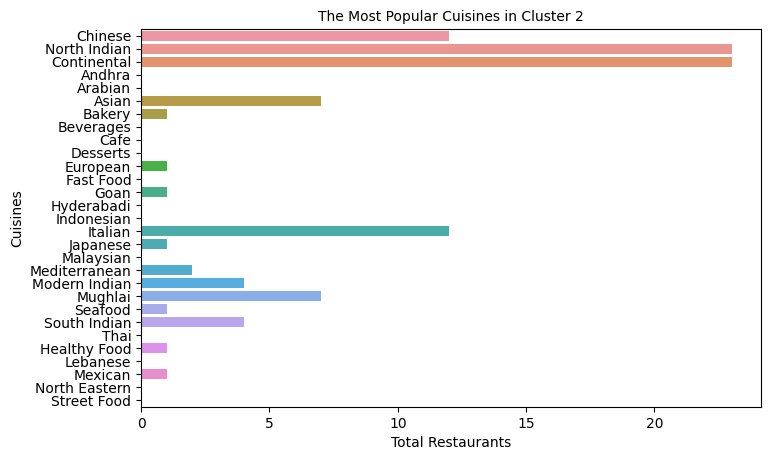

In [348]:
#visualizing cuisines in cluster 2
cluster_cuisines(names_df[names_df['label']==2],'Cluster 2')

**Cluster 2 Observation:**

*  The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Complimentary.
* The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.

**Cluster 3**

In [350]:
#exploring cluster 3
names_df[names_df['label']==3].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,Absolute Sizzlers,750.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3.62,3
47,Shanghai Chef 2,800.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,3.06,3
54,Asian Meal Box,200.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.58,3


In [351]:
#describe
names_df[names_df['label']==3].describe()

,Cost,Total Cuisines,Avg Rating,label
count,10.000000,10.000000,10.000000,10.0
mean,890.000000,2.400000,3.185000,3.0
std,532.186266,1.173788,1.219617,0.0
min,200.000000,1.000000,0.000000,3.0
25%,600.000000,2.000000,3.137500,3.0
50%,825.000000,2.000000,3.635000,3.0
75%,1075.000000,3.500000,3.706250,3.0
max,1750.000000,4.000000,4.450000,3.0


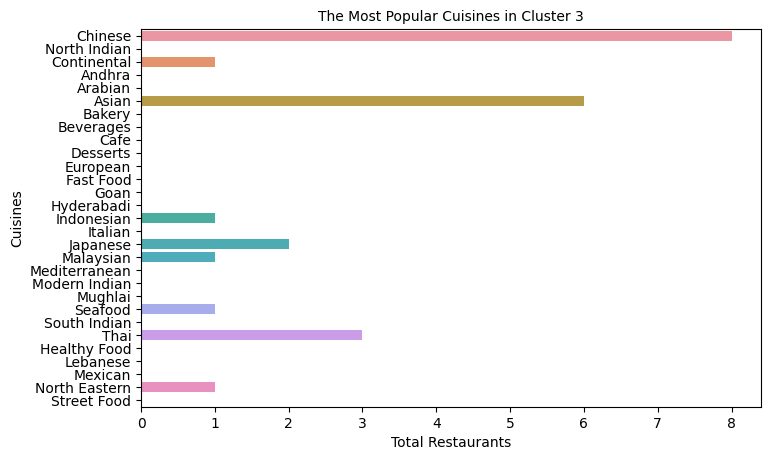

In [352]:
#visualizing cuisines in cluster 3
cluster_cuisines(names_df[names_df['label']==3],'Cluster 3')

**Cluster 3 Observation:**

*  The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.
* The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR. 

**Cluster 4**

In [353]:
#exploring cluster 4
names_df[names_df['label']==4].head(3)

,,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,Cafe,Desserts,European,Fast Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Malaysian,Mediterranean,Modern Indian,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
Index,Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,Shah Ghouse Spl Shawarma,300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3.430000,4
9,Cream Stone,350.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.845000,4
23,Amul,150.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.929293,4


In [354]:
#describe
names_df[names_df['label']==4].describe()

,Cost,Total Cuisines,Avg Rating,label
count,16.000000,16.000000,16.000000,16.0
mean,406.250000,1.875000,3.146518,4.0
std,240.052078,0.806226,1.275203,0.0
min,150.000000,1.000000,0.000000,4.0
25%,200.000000,1.000000,3.087500,4.0
50%,350.000000,2.000000,3.667500,4.0
75%,600.000000,2.250000,3.846250,4.0
max,1000.000000,3.000000,3.965000,4.0


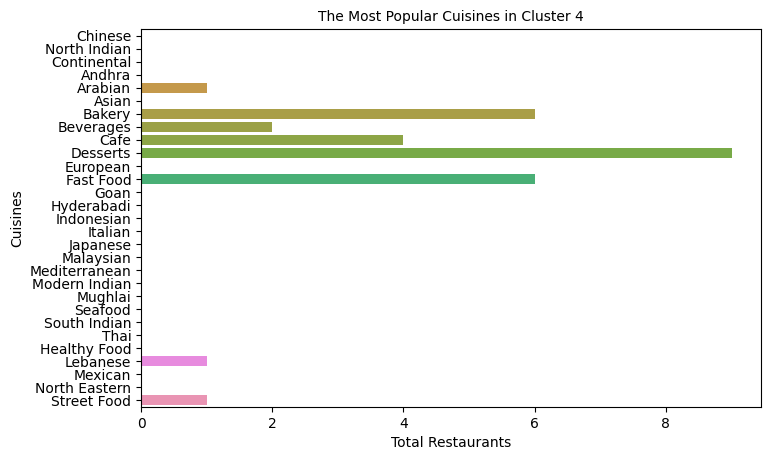

In [355]:
#visualizing cuisines in cluster 4
cluster_cuisines(names_df[names_df['label']==4],'Cluster 4')

**Cluster 4 Observation:**
*  The restaurants in cluster 4 are basically small food joints, bakeries and cafe's.
* The average rating is 3.14 and the average cost is 406 INR. 